In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
import pickle
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
sns.set_style('whitegrid')

## 1. Data Loading and Initial Exploration

In [5]:
df = pd.read_csv(r'data/Loandata.csv')

In [6]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
df.shape

(614, 13)

## 2. Data Summary and Statistics

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [10]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [11]:
df.describe(include=['O'])

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


## 3. Data Cleaning and Preprocessing

In [13]:
print(df.isnull().sum())

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [14]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])

In [15]:
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])

In [16]:
df['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [17]:
df['Dependents'] = df['Dependents'].replace({'3+': '3'})

In [18]:
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])

In [19]:
df['Dependents'] = df['Dependents'].astype(int)

In [20]:
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [21]:
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())

In [22]:
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])

In [23]:
df['Credit_History'].value_counts(dropna=False)

Credit_History
1.0    475
0.0     89
NaN     50
Name: count, dtype: int64

In [24]:
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])

In [25]:
print(df.isnull().sum())

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


In [26]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents             int32
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [27]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## 4. Feature Engineering

In [29]:
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['EMI'] = df['LoanAmount'] / df['Loan_Amount_Term']
df['BalanceIncome'] = df['TotalIncome'] - (df['EMI'] * 1000) 

In [30]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,EMI,BalanceIncome
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,5849.0,0.355556,5493.444444
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0,0.355556,5735.444444
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0,0.183333,2816.666667
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0,0.333333,4607.666667
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0,0.391667,5608.333333


In [31]:
# Convert categorical to numerical
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
df['Married'] = df['Married'].map({'Yes': 1, 'No': 0})
df['Education'] = df['Education'].map({'Graduate': 1, 'Not Graduate': 0})
df['Self_Employed'] = df['Self_Employed'].map({'Yes': 1, 'No': 0})
df['Loan_Status'] = df['Loan_Status'].map({'Y': 1, 'N': 0})

In [32]:
# Property Area (one-hot encoding)
df = pd.get_dummies(df, columns=['Property_Area'], drop_first=True)

In [33]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,TotalIncome,EMI,BalanceIncome,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,1,0,0,1,0,5849,0.0,128.0,360.0,1.0,1,5849.0,0.355556,5493.444444,False,True
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,6091.0,0.355556,5735.444444,False,False
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,3000.0,0.183333,2816.666667,False,True
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,4941.0,0.333333,4607.666667,False,True
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,6000.0,0.391667,5608.333333,False,True


In [45]:
df = df.drop('Loan_ID', axis=1)

## 5. Data Visualization

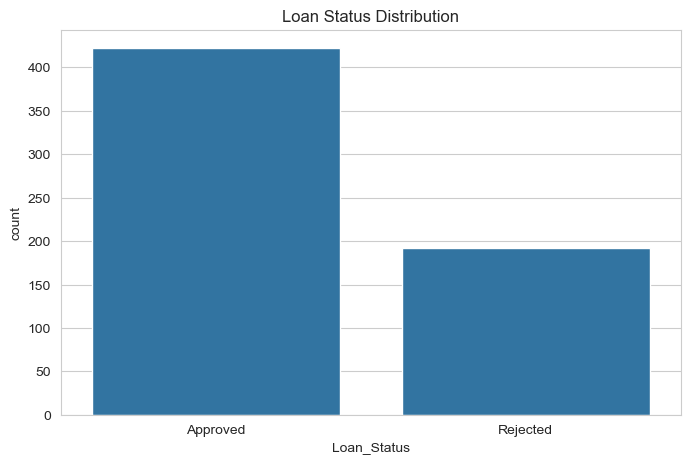

In [47]:
plt.figure(figsize=(8,5))
sns.countplot(x=df['Loan_Status'].map({0: 'Rejected', 1: 'Approved'}), data=df)
plt.title('Loan Status Distribution')
plt.show()

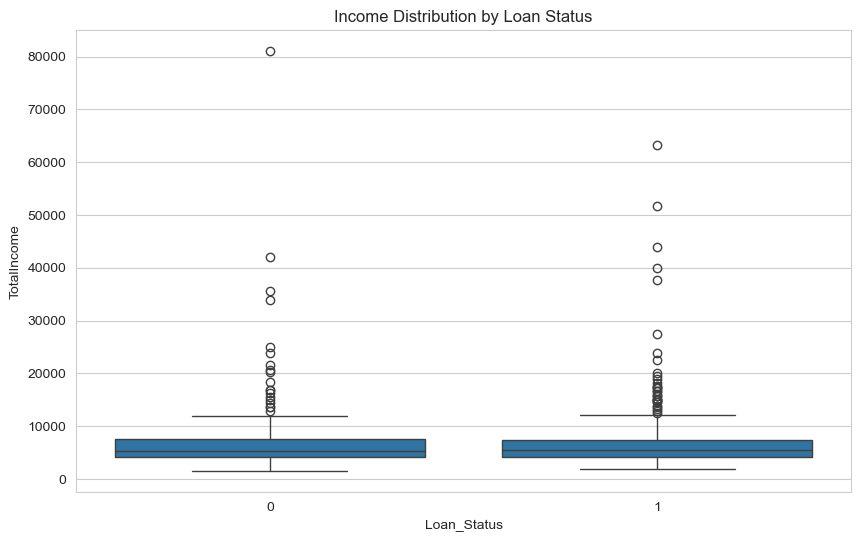

In [49]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Loan_Status', y='TotalIncome', data=df)
plt.title('Income Distribution by Loan Status')
plt.show()


<Figure size 800x500 with 0 Axes>

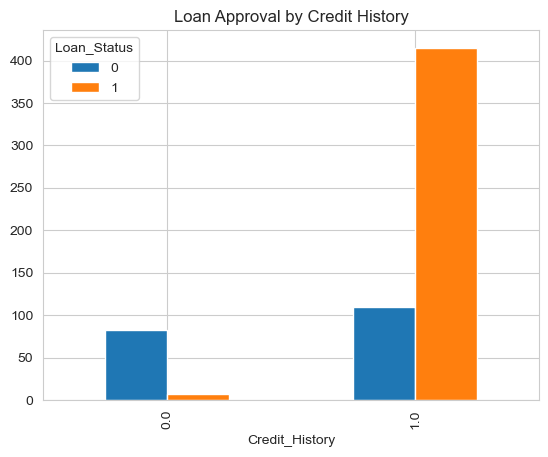

In [51]:
plt.figure(figsize=(8,5))
pd.crosstab(df['Credit_History'], df['Loan_Status']).plot(kind='bar')
plt.title('Loan Approval by Credit History')
plt.show()

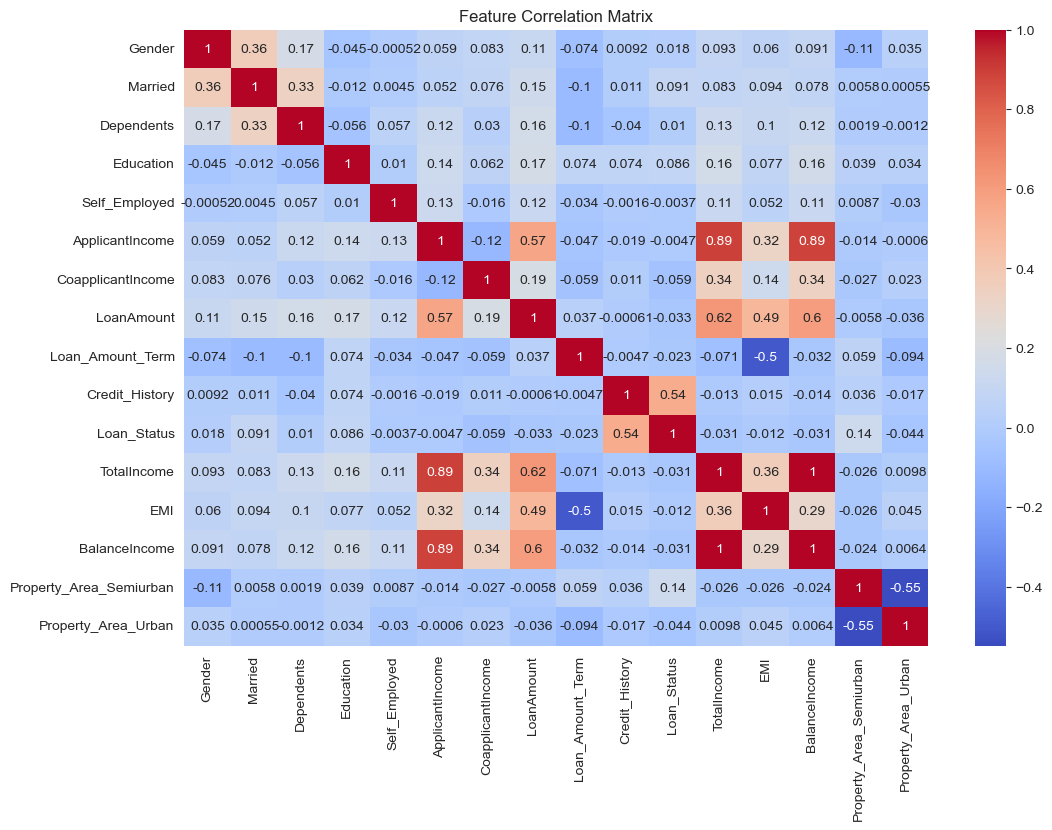

In [53]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

## 6. Model Building

In [61]:
X = df.drop(['Loan_Status'], axis=1)
y = df['Loan_Status']

In [65]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [67]:
# Scale numerical features
scaler = StandardScaler()
num_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term',
            'TotalIncome', 'EMI', 'BalanceIncome']
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [69]:
# Train Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [71]:
# Evaluate model
y_pred = model.predict(X_test)
print("Model Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Model Accuracy: 0.7723577235772358

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.47      0.59        43
           1       0.77      0.94      0.84        80

    accuracy                           0.77       123
   macro avg       0.78      0.70      0.72       123
weighted avg       0.78      0.77      0.75       123



In [75]:
# Save model and scaler
pickle.dump(model, open('loan_model.pkl', 'wb'))
pickle.dump(scaler, open('scaler.pkl', 'wb'))

In [78]:
def predict_loan_eligibility(input_data):
    """
    Predict loan eligibility in real-time based on customer details
    
    Parameters:
    input_data (dict): Dictionary containing customer details with these keys:
        - 'Gender' (str): 'Male' or 'Female'
        - 'Married' (str): 'Yes' or 'No'
        - 'Dependents' (int): 0, 1, 2, or 3
        - 'Education' (str): 'Graduate' or 'Not Graduate'
        - 'Self_Employed' (str): 'Yes' or 'No'
        - 'ApplicantIncome' (float)
        - 'CoapplicantIncome' (float)
        - 'LoanAmount' (float)
        - 'Loan_Amount_Term' (float)
        - 'Credit_History' (int): 0 or 1
        - 'Property_Area' (str): 'Urban', 'Semiurban', or 'Rural'
    
    Returns:
    dict: Prediction and probability with keys:
        - 'eligible' (bool): True if approved
        - 'probability' (float): Confidence score
        - 'message' (str): Explanation
    """
    # Load model and scaler
    model = pickle.load(open('loan_model.pkl', 'rb'))
    scaler = pickle.load(open('scaler.pkl', 'rb'))
    
    # Create DataFrame from input
    input_df = pd.DataFrame([input_data])
    
    # Feature engineering (same as training)
    input_df['TotalIncome'] = input_df['ApplicantIncome'] + input_df['CoapplicantIncome']
    input_df['EMI'] = input_df['LoanAmount'] / input_df['Loan_Amount_Term']
    input_df['BalanceIncome'] = input_df['TotalIncome'] - (input_df['EMI'] * 1000)
    
    # Convert categorical to numerical
    input_df['Gender'] = input_df['Gender'].map({'Male': 1, 'Female': 0})
    input_df['Married'] = input_df['Married'].map({'Yes': 1, 'No': 0})
    input_df['Education'] = input_df['Education'].map({'Graduate': 1, 'Not Graduate': 0})
    input_df['Self_Employed'] = input_df['Self_Employed'].map({'Yes': 1, 'No': 0})
    
    # One-hot encoding for Property_Area
    input_df['Property_Area_Semiurban'] = (input_df['Property_Area'] == 'Semiurban').astype(int)
    input_df['Property_Area_Urban'] = (input_df['Property_Area'] == 'Urban').astype(int)
    input_df.drop('Property_Area', axis=1, inplace=True)
    
    # Scale numerical features
    num_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term',
                'TotalIncome', 'EMI', 'BalanceIncome']
    input_df[num_cols] = scaler.transform(input_df[num_cols])
    
    # Make prediction
    proba = model.predict_proba(input_df)[0][1]
    prediction = model.predict(input_df)[0]
    
    # Prepare response
    result = {
        'eligible': bool(prediction),
        'probability': float(proba),
        'message': 'Approved' if prediction else 'Not Approved'
    }
    
    # Add reason for rejection
    if not prediction:
        if input_data['Credit_History'] == 0:
            result['message'] += ' - Poor Credit History'
        elif input_df['BalanceIncome'].values[0] < 0:
            result['message'] += ' - Insufficient Balance Income'
        elif input_df['EMI'].values[0] > 0.5 * input_df['TotalIncome'].values[0]:
            result['message'] += ' - High EMI to Income Ratio'
    
    return result

In [80]:
# Example customer data
customer_data = {
    'Gender': 'Male',
    'Married': 'Yes',
    'Dependents': 2,
    'Education': 'Graduate',
    'Self_Employed': 'No',
    'ApplicantIncome': 5000,
    'CoapplicantIncome': 2000,
    'LoanAmount': 150,
    'Loan_Amount_Term': 360,
    'Credit_History': 1,
    'Property_Area': 'Urban'
}

# Get prediction
prediction = predict_loan_eligibility(customer_data)
print("\nPrediction Result:")
for key, value in prediction.items():
    print(f"{key}: {value}")


Prediction Result:
eligible: True
probability: 0.96
message: Approved
